In [2]:
import sys
import numpy as np
import numpy.random as rnd
from numpy import linalg as LA
import scipy.cluster.vq as vq
import matplotlib.pyplot as plt

In [110]:
states = ['A', 'B', 'C']
indices = range(len(states))

In [111]:
state2index = dict(zip(states, indices)) 
index2state = dict(zip(indices, states))

In [112]:
P1 = np.array([[0.30, 0.20, 0.50], [0.50, 0.30, 0.20], [0.20, 0.50, 0.30]])

P2 = np.array([[0.25, 0.10, 0.25], [0.50, 0.80, 0.50], [0.25, 0.10, 0.25]])

In [113]:
def generateStateSequence(s, P, tau):
    sseq = [s]
    iold = state2index[s]
    
    for t in range(tau):
        inew = rnd.choice(indices, p = P[:,iold])
        sseq.append(index2state[inew])
        iold = inew
    
    return sseq

In [38]:
sseq = generateStateSequence('B', P2, 10)
iseq = [state2index[s] for s in sseq]

In [39]:
print(sseq)
print(iseq)

['B', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'C', 'B']
[1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1]


In [40]:
tmax = len(sseq)
like1 = np.sum([ np.log(P1[iseq[t],iseq[t-1]]) for t in range(1,tmax) ]) 
like2 = np.sum([ np.log(P2[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])

In [41]:
print(like1)
print(like2)

-11.72364649628588
-13.369223455335854


# TASK 14.1 

In [42]:
t = [1, 2, 4, 8, 16]
S = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

for i in t:
    for j in range(len(S)):
        print("State vectors at time %s with initial pi[%s]:" % (i, j))
        print(np.power(P2, i) * S[:,j])

State vectors at time 1 with initial pi[0]:
[[0.25 0.   0.  ]
 [0.5  0.   0.  ]
 [0.25 0.   0.  ]]
State vectors at time 1 with initial pi[1]:
[[0.  0.1 0. ]
 [0.  0.8 0. ]
 [0.  0.1 0. ]]
State vectors at time 1 with initial pi[2]:
[[0.   0.   0.25]
 [0.   0.   0.5 ]
 [0.   0.   0.25]]
State vectors at time 2 with initial pi[0]:
[[0.0625 0.     0.    ]
 [0.25   0.     0.    ]
 [0.0625 0.     0.    ]]
State vectors at time 2 with initial pi[1]:
[[0.   0.01 0.  ]
 [0.   0.64 0.  ]
 [0.   0.01 0.  ]]
State vectors at time 2 with initial pi[2]:
[[0.     0.     0.0625]
 [0.     0.     0.25  ]
 [0.     0.     0.0625]]
State vectors at time 4 with initial pi[0]:
[[0.00390625 0.         0.        ]
 [0.0625     0.         0.        ]
 [0.00390625 0.         0.        ]]
State vectors at time 4 with initial pi[1]:
[[0.000e+00 1.000e-04 0.000e+00]
 [0.000e+00 4.096e-01 0.000e+00]
 [0.000e+00 1.000e-04 0.000e+00]]
State vectors at time 4 with initial pi[2]:
[[0.         0.         0.00390625]
 [

In [43]:
w1, v1 = LA.eigh(P1)
w2, v2 = LA.eigh(P2)
# L1 = v1 * P1 * np.transpose(v1)
# L2 = v2 * P2 * np.transpose(v2)

In [44]:
print(v1)
print(v2)

[[-4.63673374e-01  7.07106781e-01 -5.33860471e-01]
 [ 7.54992718e-01  1.66533454e-16 -6.55733174e-01]
 [-4.63673374e-01 -7.07106781e-01 -5.33860471e-01]]
[[ 0.8107488   0.26441939 -0.52227269]
 [-0.39094493 -0.41948761 -0.81926321]
 [-0.435716    0.86839653 -0.23672566]]


# TASK 14.2

In [45]:
tmax = 10000
probemap = {}
for k in states:
    probemap[k] = 0
    
for i in range(tmax):
    sseq = []
    sseq = generateStateSequence('B', P2, 10)
    probemap[sseq[-1]] += 1

print(probemap)
print("Lilkihood of occuring A as last element", probemap['A']/tmax)
print("Lilkihood of occuring A as last element", probemap['B']/tmax)
print("Lilkihood of occuring A as last element", probemap['C']/tmax)

{'A': 1452, 'B': 7146, 'C': 1402}
Lilkihood of occuring A as last element 0.1452
Lilkihood of occuring A as last element 0.7146
Lilkihood of occuring A as last element 0.1402


# TASK 15.3

In [3]:
matX = np.loadtxt('q3dm1-path1.csv', delimiter = ',')
matY = np.loadtxt('q3dm1-path2.csv', delimiter = ',')
matX = matX.T
matY = matY.T

In [47]:
matM, inds = vq.kmeans2(matX.T, k = 10, iter = 100, minit = '++')
matN, indy = vq.kmeans2(matY.T, k = 10, iter = 100, minit = '++')
matM = matM.T
matN = matN.T

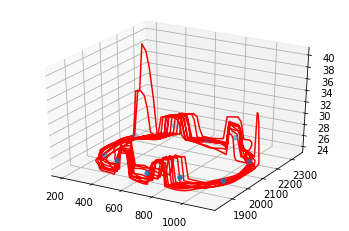

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1_axis = matX[0, :]
y1_axis = matX[1, :]
z1_axis = matX[2, :]
ax.plot3D(x1_axis, y1_axis, z1_axis, 'red');

x1 = matM[0, :]
y1 = matM[1, :]
z1 = matM[2, :]
ax.scatter3D(x1, y1, z1);

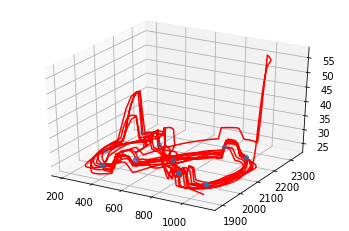

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x2_axis = matY[0, :]
y2_axis = matY[1, :]
z2_axis = matY[2, :]
ax.plot3D(x2_axis, y2_axis, z2_axis, 'red');

x2 = matN[0, :]
y2 = matN[1, :]
z2 = matN[2, :]
ax.scatter3D(x2, y2, z2);

In [50]:
s1 = []
k = 10
for i in range(len(matX.T)):
    b = []
    for j in range(k):
        b.append(np.sqrt(np.sum(matM[:, j] - matX[:, i]) ** 2))
    s1.append(b.index(min(b)))

s2 = []
for i in range(len(matY.T)):
    b = []
    for j in range(k):
        b.append(np.sqrt(np.sum(matN[:, j] - matY[:, i]) ** 2))
    s2.append(b.index(min(b)))

In [121]:
def estimateStateTransitions(indices, iseq):
    k = len(indices)
    P = np.zeros((k, k))
    for t in range(1, len(iseq)):
        P[iseq[t], iseq[t-1]] += 1
    
    return np.divide(P, np.sum(P, axis = 0))

In [122]:
indices = list(set(indy))
p_new1 = estimateStateTransitions(indices, s1)
p_new1 = np.round(p_new1, 2)
p_new2 = estimateStateTransitions(indices, s2)
p_new2 = np.round(p_new2, 2)

In [123]:
print(p_new1)
print(p_new2)

[[0.87 0.08 0.   0.   0.   0.   0.   0.   0.   0.09]
 [0.06 0.83 0.   0.   0.   0.   0.   0.   0.08 0.  ]
 [0.   0.   0.84 0.   0.   0.   0.06 0.   0.   0.09]
 [0.   0.   0.   0.94 0.   0.09 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.81 0.09 0.   0.07 0.   0.  ]
 [0.   0.   0.   0.06 0.09 0.82 0.   0.   0.   0.  ]
 [0.   0.   0.08 0.   0.   0.   0.94 0.   0.   0.  ]
 [0.   0.   0.   0.   0.09 0.   0.   0.86 0.08 0.  ]
 [0.   0.08 0.   0.   0.   0.   0.   0.07 0.85 0.  ]
 [0.06 0.   0.09 0.   0.   0.   0.   0.   0.   0.83]]
[[0.85 0.   0.05 0.   0.   0.   0.   0.09 0.   0.  ]
 [0.   0.8  0.   0.12 0.   0.   0.   0.   0.08 0.  ]
 [0.08 0.   0.88 0.   0.   0.   0.   0.   0.   0.05]
 [0.   0.11 0.   0.77 0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.11 0.89 0.   0.   0.   0.   0.06]
 [0.   0.   0.   0.   0.   0.94 0.   0.09 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.93 0.   0.06 0.  ]
 [0.07 0.   0.   0.   0.   0.06 0.   0.82 0.   0.  ]
 [0.   0.1  0.   0.   0.   0.   0.07 0.   0.8

# ADD ON 19 PART 2

In [87]:
data = "BBBCBBCBBBCBBBBBBBBBBBAABBBBABBABBCCBBBABABBBBBBBBBABBBCBABCBBBBABBCBBBCBBBBBBBBBBABBBABBABBCBBBBBBBAABBBBBBBAABBBCBABCCBBABBBBBBBBBBBABBABCCCBBBBBAABBCBBBBABBBBBBBBBBBBBABCBB"

In [88]:
sseq = list(data)
states = sorted(list(set(sseq))) 
indices = list(range(len(states)))

In [89]:
iseq = [state2index[s] for s in sseq]

In [95]:
P3 = np.round(estimateStateTransitions(indices, iseq), 2)
P3

array([[0.17, 0.15, 0.  ],
       [0.83, 0.74, 0.78],
       [0.  , 0.11, 0.22]])

## Below solutions shows the numerical instablities of the markov model 

In [80]:
sq1 = "BBCBBCBBBAC"
sq2 = "BBCBBCBBBAC"
sq3 = "BBCBBCBBBAC"

In [81]:
p1 = [P1[state2index[sq1[i]], state2index[sq1[i-1]]] for i in range(1, len(sq1))]
p2 = [P2[state2index[sq2[i]], state2index[sq2[i-1]]] for i in range(1, len(sq2))]
p3 = [P3[state2index[sq3[i]], state2index[sq3[i-1]]] for i in range(1, len(sq3))]

print(np.prod(p1))
print(np.prod(p2))
print(np.prod(p3))

3.2400000000000003e-06
2.5600000000000012e-05
0.0


In [82]:
p1 = [np.log(P1[state2index[sq1[i]], state2index[sq1[i-1]]]) for i in range(1, len(sq1))]
p2 = [np.log(P2[state2index[sq2[i]], state2index[sq2[i-1]]]) for i in range(1, len(sq2))]
p3 = [np.log(P3[state2index[sq3[i]], state2index[sq3[i-1]]]) for i in range(1, len(sq3))]

print(np.sum(p1))
print(np.sum(p2))
print(np.sum(p3))

-12.639937228160035
-10.572918206478757
-inf


/Users/bndeepankan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


## Adding a constant to the probability  

In [100]:
P3 = np.round(estimateStateTransitions(indices, iseq), 2)
P3 = np.add(P3, 0.1)
P3 = np.round(np.divide(P3, np.sum(P3, axis=0)), 2)
P3

array([[0.21, 0.19, 0.08],
       [0.72, 0.65, 0.68],
       [0.08, 0.16, 0.25]])

In [101]:
p1 = [P1[state2index[sq1[i]], state2index[sq1[i-1]]] for i in range(1, len(sq1))]
p2 = [P2[state2index[sq2[i]], state2index[sq2[i-1]]] for i in range(1, len(sq2))]
p3 = [P3[state2index[sq3[i]], state2index[sq3[i-1]]] for i in range(1, len(sq3))]

print(np.prod(p1))
print(np.prod(p2))
print(np.prod(p3))

3.2400000000000003e-06
2.5600000000000012e-05
3.21184667648e-05


In [102]:
p1 = [np.log(P1[state2index[sq1[i]], state2index[sq1[i-1]]]) for i in range(1, len(sq1))]
p2 = [np.log(P2[state2index[sq2[i]], state2index[sq2[i-1]]]) for i in range(1, len(sq2))]
p3 = [np.log(P3[state2index[sq3[i]], state2index[sq3[i-1]]]) for i in range(1, len(sq3))]

print(np.sum(p1))
print(np.sum(p2))
print(np.sum(p3))

-12.639937228160035
-10.572918206478757
-10.346079404620312


# TASK 16.1

In [22]:
def findLikelihood1(curr, move, t):
    room = states.index(curr)
    move = states.index(move)
    like = t*np.log(P2[room, room]) + np.log(1 - P2[move, room])
    return like

In [23]:
t = [5, 10, 100]
curr = ['B', 'B', 'B']
move = ['B', 'C', 'A']


for k in range(len(t)):
    print("Likelihood that it will not be at state %s after %s steps while starting from %s :" % (move[0], t[k], curr[0]))
    print(findLikelihood1(curr[0], move[0], t[k]))

Likelihood that it will not be at state B after 5 steps while starting from B :
-2.725155669005149
Likelihood that it will not be at state B after 10 steps while starting from B :
-3.8408734255761976
Likelihood that it will not be at state B after 100 steps while starting from B :
-23.92379304385507


# TASK 16.2

In [24]:
def findLikelihood2(curr, move, t):
    room = states.index(curr)
    move = states.index(move)
    like = t*np.log(P2[room, room]) + np.log(P2[move, room])
    return like

In [25]:
for k in range(len(t)):
    print("Likelihood that it will be at state %s after %s steps while starting from %s :" % (move[1], t[k], curr[1]))
    
    print(findLikelihood2(curr[1], move[1], t[k]))

Likelihood that it will be at state C after 5 steps while starting from B :
-3.418302849565094
Likelihood that it will be at state C after 10 steps while starting from B :
-4.534020606136142
Likelihood that it will be at state C after 100 steps while starting from B :
-24.616940224415018


# TASK 16.3

In [26]:
def findLikelihood3(curr, move,t):
    room = states.index(curr)
    move = states.index(move)
    mid = states.index('C')
    like = (t-1)*(np.log(1 - P2[move, room]) + np.log(1 - P2[move, mid])) + np.log(1 - P2[move, room])
    return like

In [27]:
for k in range(len(t)):
    print("Likelihood that it will not be at state %s after %s steps while starting from %s :" % (move[2], t[k], curr[2]))
    
    print(findLikelihood3(curr[2], move[2], t[k]))

Likelihood that it will not be at state A after 5 steps while starting from B :
-1.677530868096255
Likelihood that it will not be at state A after 10 steps while starting from B :
-3.642743808644291
Likelihood that it will not be at state A after 100 steps while starting from B :
-39.01657673850894


# SELF TEST 1

# Inference with Markov models

In [28]:
P1 = np.array([[0.3, 0.2, 0.5], [0.5, 0.3, 0.2], [0.2, 0.5, 0.3]])

In [29]:
Pr1 = P1[state2index['B'], state2index['C']] * P1[state2index['A'], state2index['B']]
Lg1 = np.log(P1[state2index['B'], state2index['C']]) + np.log(P1[state2index['A'], state2index['B']])

In [44]:
print("the NPC goes from room C to room B and then to room A Probability is %s" % np.round(Pr1, 2))
print("the NPC goes from room C to room B and then to room A Liklihood is %s" % np.round(Lg1, 2))

the NPC goes from room C to room B and then to room A Probability is 0.04
the NPC goes from room C to room B and then to room A Liklihood is -3.22


In [31]:
Pr2 = P1[state2index['A'], state2index['C']] * P1[state2index['B'], state2index['A']]
Lg2 = np.log(P1[state2index['A'], state2index['C']]) + np.log(P1[state2index['B'], state2index['A']])

In [45]:
print("the NPC goes from room C to room A and then to room B Probability is %s" % np.round(Pr2, 2))
print("the NPC goes from room C to room A and then to room B Liklihood is %s" % np.round(Lg2, 2))

the NPC goes from room C to room A and then to room B Probability is 0.25
the NPC goes from room C to room A and then to room B Liklihood is -1.39


# Sampling a Markov model

In [135]:
s = 200
sseq = generateStateSequence('A', P1, s-1)

In [136]:
for i in sseq:
    print(i, end='')

ABAABCCAABBCCACAABBCBACBCACBACBBCABABCCABBCACBBCACCCCAAABCCCABBCCCCCACBABCCBCBCBCCACBCCACACBAABBBBCAACBACBABBACACBAAAAACCABBACBABBCBBBCBCBACABCAAABABCCACBCBCBBACBAABABBCBACCAACAABBCBACBBBBCCCABBBCBCCC

In [139]:
probemap = {}
tmax = 1000
for i in range(tmax):
    probemap[i] = generateStateSequence('A', P1, s-1)

In [142]:
liklihood = [0] * tmax

for key, iseq in probemap.items():
    liklihood[key] =np.sum([ np.log(P1[state2index[iseq[t]],state2index[iseq[t-1]]]) for t in range(1,s) ])

# np.sum([ np.log(P1[iseq[t],iseq[t-1]]) for t in range(1,s) ])
avgLog = sum(liklihood)/tmax

In [143]:
print("Average log liklihood %s" % avgLog)

Average log liklihood -232.32172991380622


In [137]:
# Pahulmeet Code

import numpy as np
import numpy.linalg as la
import numpy.random as rnd
stateSpace = ['A', 'B', 'C']
stateIndex = range(len(stateSpace))
state2index = dict(zip(stateSpace, stateIndex))
index2state = dict(zip(stateIndex, stateSpace))

def generateStateSequence(s0, matP, n):
    sequence = [s0]
    for t in range(n):
        i = state2index[sequence[t-1]]
        j = rnd.choice(stateIndex, p=matP[:,i])
        sequence.append(index2state[j])
    return sequence

matP = np.array([[0.3,0.2,0.5],[0.5,0.3,0.2],[0.2,0.5,0.3]])

sseq=[]
sseq.clear
sseq=generateStateSequence('A', matP, 199)
iseq = [state2index[s] for s in sseq]
n = len(iseq)
    
prob = np.prod([ matP[iseq[t],iseq[t-1]] for t in range(1,n) ])
like = np.sum([ np.log(matP[iseq[t],iseq[t-1]]) for t in range(1,n) ])
print(like)

-229.97730539295696


array([[0.3, 0.2, 0.5],
       [0.5, 0.3, 0.2],
       [0.2, 0.5, 0.3]])

# Learning a Markov model

In [116]:
s = []
for i in sseq:
    s.append(state2index[i])

In [117]:
indices = list(set(sseq))
P_new = estimateStateTransitions(indices, s)

In [119]:
P_new = np.round(P_new, 2) # New state transion probabilities based on the generated Sequence
P_new

array([[0.25, 0.24, 0.38],
       [0.59, 0.29, 0.29],
       [0.15, 0.47, 0.32]])

# Stationary distribution a Markov model

In [71]:
m = P1.shape[0]
vecB = np.hstack((np.zeros(m), 1))
matI = np.eye(m)
matA = np.vstack((matI-P1, np.ones(m)))
vecPI = np.linalg.lstsq(matA, vecB)[0]

/Users/bndeepankan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [72]:
vecPI = np.round(vecPI, 2)
print(vecPI)

[0.33 0.33 0.33]


In [42]:
for i in sseq:
    print(i, end='')

ABCABAABABBCBBCACCAAAABBCBCACCCABCABCCCABBBACCBCCCBCABCBACCBBBCBCABAABBCAABCCBCAABBCCBCAABCCACAAABBCABCBBBBCABCCAABCABAABABCABCAAABCAACCBCCAABAABABCAABACABCACABBCCAAACCACBAACBCABCCABCABABBBBBCACABCCAB

# Correct answer 16.3

In [2]:
def allSequences(s0, states, tau): 
    sequences = [s0]
    for t in range(tau):
        new_sequences = []
        for sequence in sequences:
            for s in states: 
                new_sequences.append(sequence+s)
        sequences = new_sequences 
    return sequences

In [5]:
sequences = allSequences('B', ['B', 'C'], 5) 
for sequence in sequences:
    print (''.join(sequence))

BBBBBB
BBBBBC
BBBBCB
BBBBCC
BBBCBB
BBBCBC
BBBCCB
BBBCCC
BBCBBB
BBCBBC
BBCBCB
BBCBCC
BBCCBB
BBCCBC
BBCCCB
BBCCCC
BCBBBB
BCBBBC
BCBBCB
BCBBCC
BCBCBB
BCBCBC
BCBCCB
BCBCCC
BCCBBB
BCCBBC
BCCBCB
BCCBCC
BCCCBB
BCCCBC
BCCCCB
BCCCCC


In [7]:
def prob(sseq, matP):
    iseq = [state2index[s] for s in sseq]
    tmax = len(iseq)
    return np.prod([ matP[iseq[t],iseq[t-1]] for t in range(1,tmax) ])


In [16]:
for tau in [5, 10]:
    sequences = allSequences('B', ['B', 'C'], tau)
    p = np.sum([prob(sequence, P2) for sequence in sequences])
    print("Probability for %s:" % tau, p)
    L = np.log(p)
    print("Log liklihood for %s:" % tau, L)

Probability for 5: 0.5412993750000002
Log liklihood for 5: -0.613782779807619
Probability for 10: 0.28474919653886727
Log liklihood for 10: -1.2561464982958157


In [14]:
L

-1.2561464982958157